In [1]:
%%HTML
<div class='tableauPlaceholder' id='viz1512233423027' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;RD&#47;RDGKRRHB7&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;RDGKRRHB7' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;RD&#47;RDGKRRHB7&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1512233423027');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1020px';vizElement.style.minHeight='687px';vizElement.style.maxHeight='1587px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
from scipy.misc import imread
import codecs
from subprocess import check_output
print(check_output(["ls", "./input"]).decode("utf8"))

globalterrorismdb_0617dist.csv
test.csv
train.csv



In [4]:
terror=pd.read_csv('./input/globalterrorismdb_0617dist.csv',encoding='ISO-8859-1')
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['casualities']=terror['Killed']+terror['Wounded']
terror.head(50)

Year  Month  Day             Country                       Region  \
0   1970      7    2  Dominican Republic  Central America & Caribbean   
1   1970      0    0              Mexico                North America   
2   1970      1    0         Philippines               Southeast Asia   
3   1970      1    0              Greece               Western Europe   
4   1970      1    0               Japan                    East Asia   
5   1970      1    1       United States                North America   
6   1970      1    2             Uruguay                South America   
7   1970      1    2       United States                North America   
8   1970      1    2       United States                North America   
9   1970      1    3       United States                North America   
10  1970      1    1       United States                North America   
11  1970      1    6       United States                North America   
12  1970      1    8               Italy               Western Europe   
13  1970      1    9       United States                North America   
14  1970      1    9       United States                North America   
15  1970      1   10  East Germany (GDR)               Eastern Europe   
16  1970      1   11            Ethiopia           Sub-Saharan Africa   
17  1970      1   12       United States                North America   
18  1970      1   12       United States                North America   
19  1970      1   13       United States                North America   
20  1970      1   14       United States                North America   
21  1970      1   15             Uruguay                South America   
22  1970      1   19       United States                North America   
23  1970      1   19       United States                North America   
24  1970      1   19       United States                North America   
25  1970      1   20           Guatemala  Central America & Caribbean   
26  1970      1   21         Philippines               Southeast Asia   
27  1970      1   22           Venezuela                South America   
28  1970      1   22       United States                North America   
29  1970      1   25       United States                North America   
30  1970      1   25       United States                North America   
31  1970      1   26       United States                North America   
32  1970      1   26       United States                North America   
33  1970      1   27       United States                North America   
34  1970      1   28  East Germany (GDR)               Eastern Europe   
35  1970      1   28       United States                North America   
36  1970      1   30       United States                North America   
37  1970      1   30       United States                North America   
38  1970      1   30       United States                North America   
39  1970      1   31         Philippines               Southeast Asia   
40  1970      1   31       United States                North America   
41  1970      2    1       United States                North America   
42  1970      2    1       United States                North America   
43  1970      2    2       United States                North America   
44  1970      2    3       United States                North America   
45  1970      2    3       United States                North America   
46  1970      2    4       United States                North America   
47  1970      2    6       United States                North America   
48  1970      2    6       United States                North America   
49  1970      2    6       United States                North America   

                city   latitude   longitude                      AttackType  \
0      Santo Domingo  18.456792  -69.951164                   Assassination   
1        Mexico city  19.432608  -99.133207     Hostage Taking (Kidnapping)   
2            Unknown  15.478598  120.599741

In [5]:
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              446
latitude         4606
longitude        4606
AttackType          0
Killed           9682
Wounded         15325
Target            634
Summary         66138
Group               0
Target_type         0
Weapon_type         0
Motive         121764
casualities     15826
dtype: int64

In [6]:
print('Country with Highest Terrorist Attacks:',terror['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terror['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terror['Killed'].max(),'that took place in',terror.loc[terror['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1500.0 that took place in Iraq


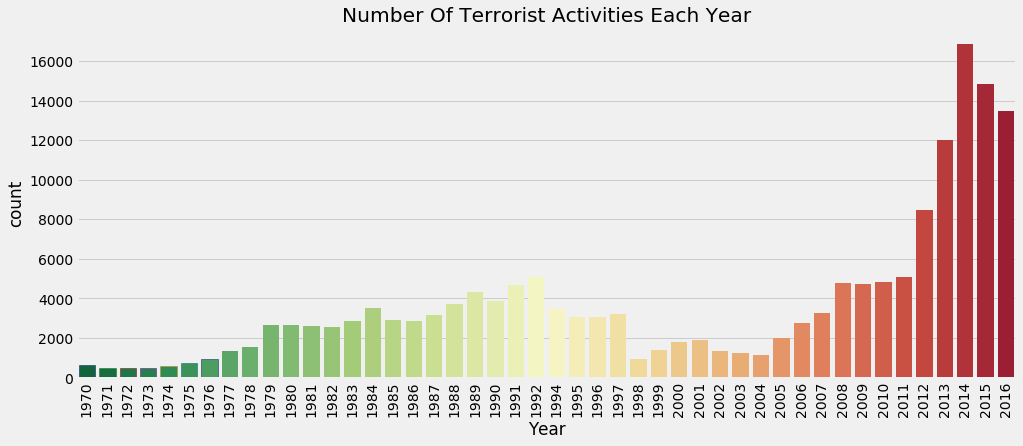

In [8]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

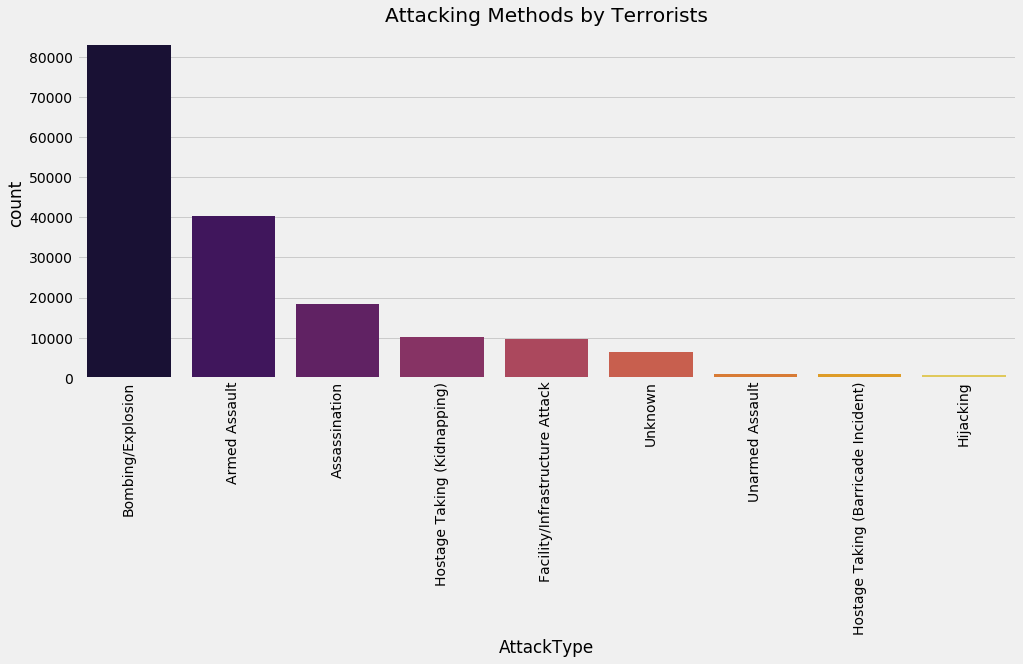

In [9]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=terror,palette='inferno',order=terror['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

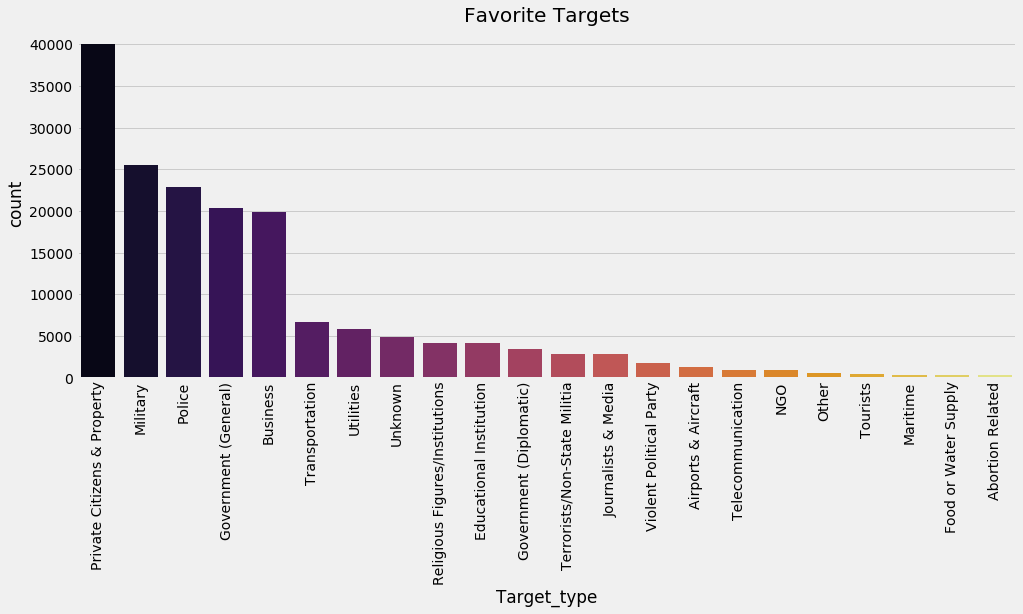

In [10]:
plt.subplots(figsize=(15,6))
sns.countplot(terror['Target_type'],palette='inferno',order=terror['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

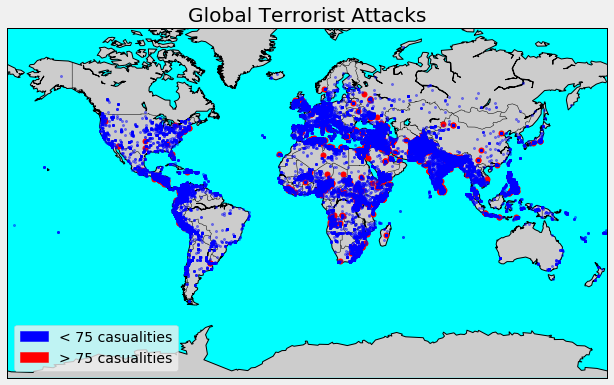

In [11]:
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
lat_100=list(terror[terror['casualities']>=75].latitude)
long_100=list(terror[terror['casualities']>=75].longitude)
x_100,y_100=m3(long_100,lat_100)
m3.plot(x_100, y_100,'go',markersize=5,color = 'r')
lat_=list(terror[terror['casualities']<75].latitude)
long_=list(terror[terror['casualities']<75].longitude)
x_,y_=m3(long_,lat_)
m3.plot(x_, y_,'go',markersize=2,color = 'b',alpha=0.4)
m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(lake_color='aqua')
m3.drawmapboundary(fill_color='aqua')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.title('Global Terrorist Attacks')
plt.legend(loc='lower left',handles=[mpatches.Patch(color='b', label = "< 75 casualities"),
                    mpatches.Patch(color='red',label='> 75 casualities')])
plt.show()

In [12]:
terror_fol=terror.copy()
terror_fol.dropna(subset=['latitude','longitude'],inplace=True)
location_fol=terror_fol[['latitude','longitude']][:5000]
country_fol=terror_fol['Country'][:5000]
city_fol=terror_fol['city'][:5000]
killed_fol=terror_fol['Killed'][:5000]
wound_fol=terror_fol['Wounded'][:5000]
def color_point(x):
    if x>=30:
        color='red'
    elif ((x>0 and x<30)):
        color='blue'
    else:
        color='green'
    return color   
def point_size(x):
    if (x>30 and x<100):
        size=2
    elif (x>=100 and x<500):
        size=8
    elif x>=500:
        size=16
    else:
        size=0.5
    return size   
map2 = folium.Map(location=[30,0],tiles='CartoDB dark_matter',zoom_start=2)
for point in location_fol.index:
    info='<b>Country: </b>'+str(country_fol[point])+'<br><b>City: </b>: '+str(city_fol[point])+'<br><b>Killed </b>: '+str(killed_fol[point])+'<br><b>Wounded</b> : '+str(wound_fol[point])
    iframe = folium.IFrame(html=info, width=200, height=200)
    folium.CircleMarker(list(location_fol.loc[point].values),popup=folium.Popup(iframe),radius=point_size(killed_fol[point]),color=color_point(killed_fol[point])).add_to(map2)
map2

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


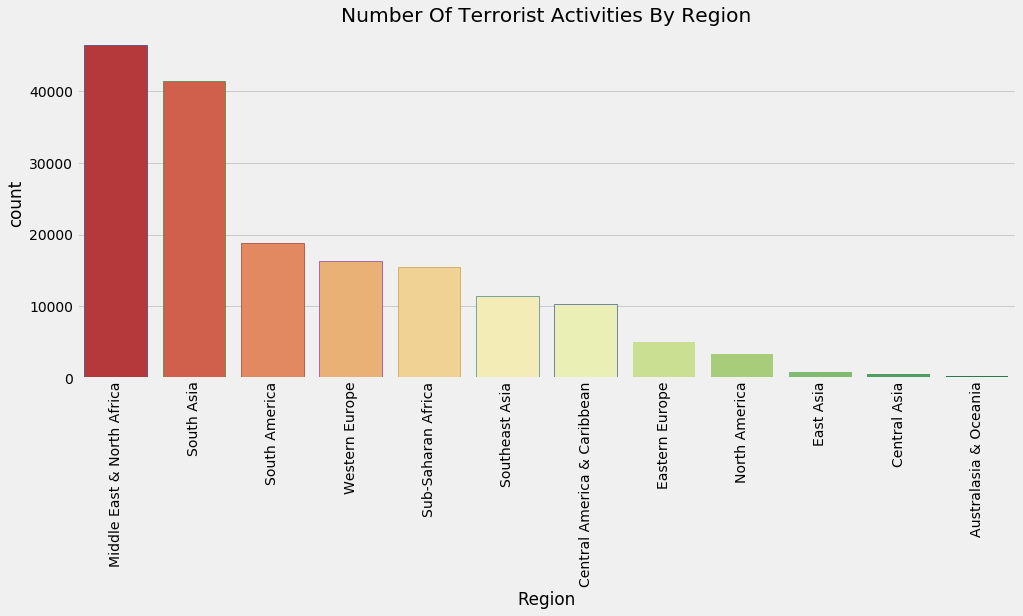

In [13]:
plt.subplots(figsize=(15,6))
sns.countplot('Region',data=terror,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=terror['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

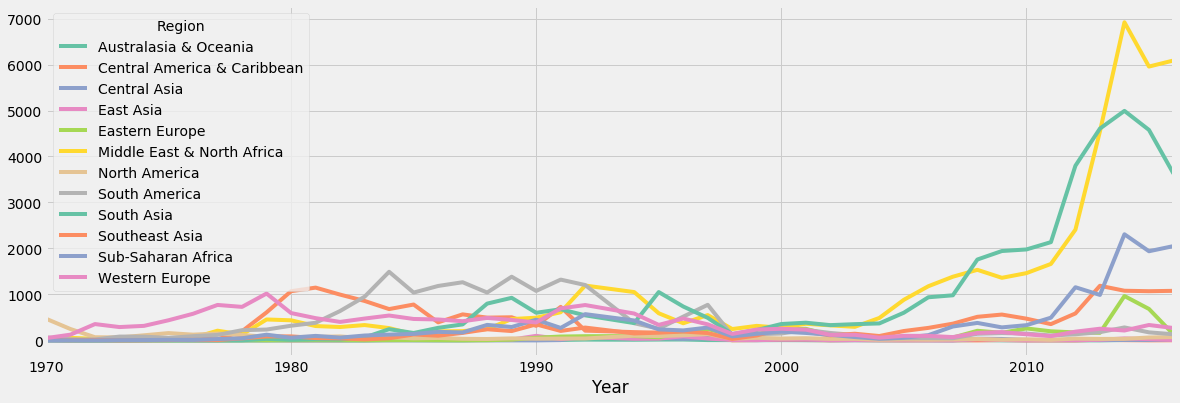

In [14]:
terror_region=pd.crosstab(terror.Year,terror.Region)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

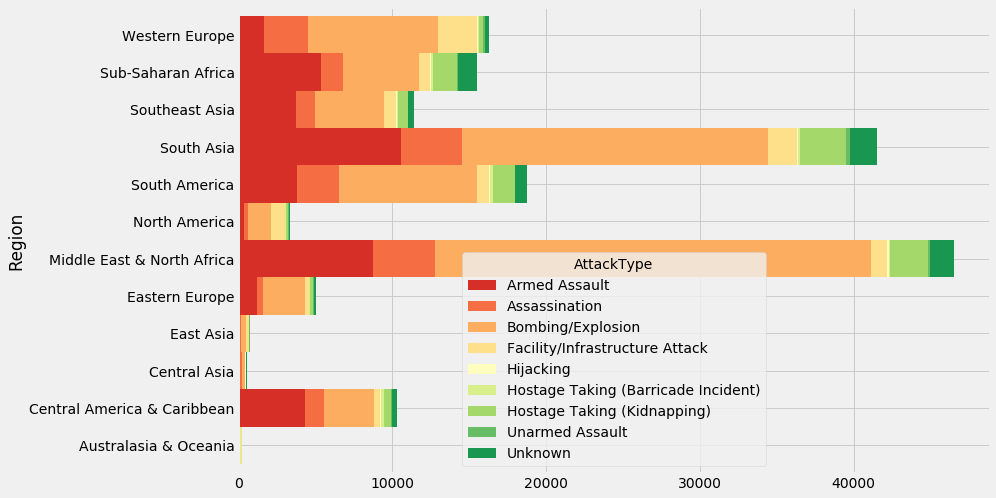

In [15]:
pd.crosstab(terror.Region,terror.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

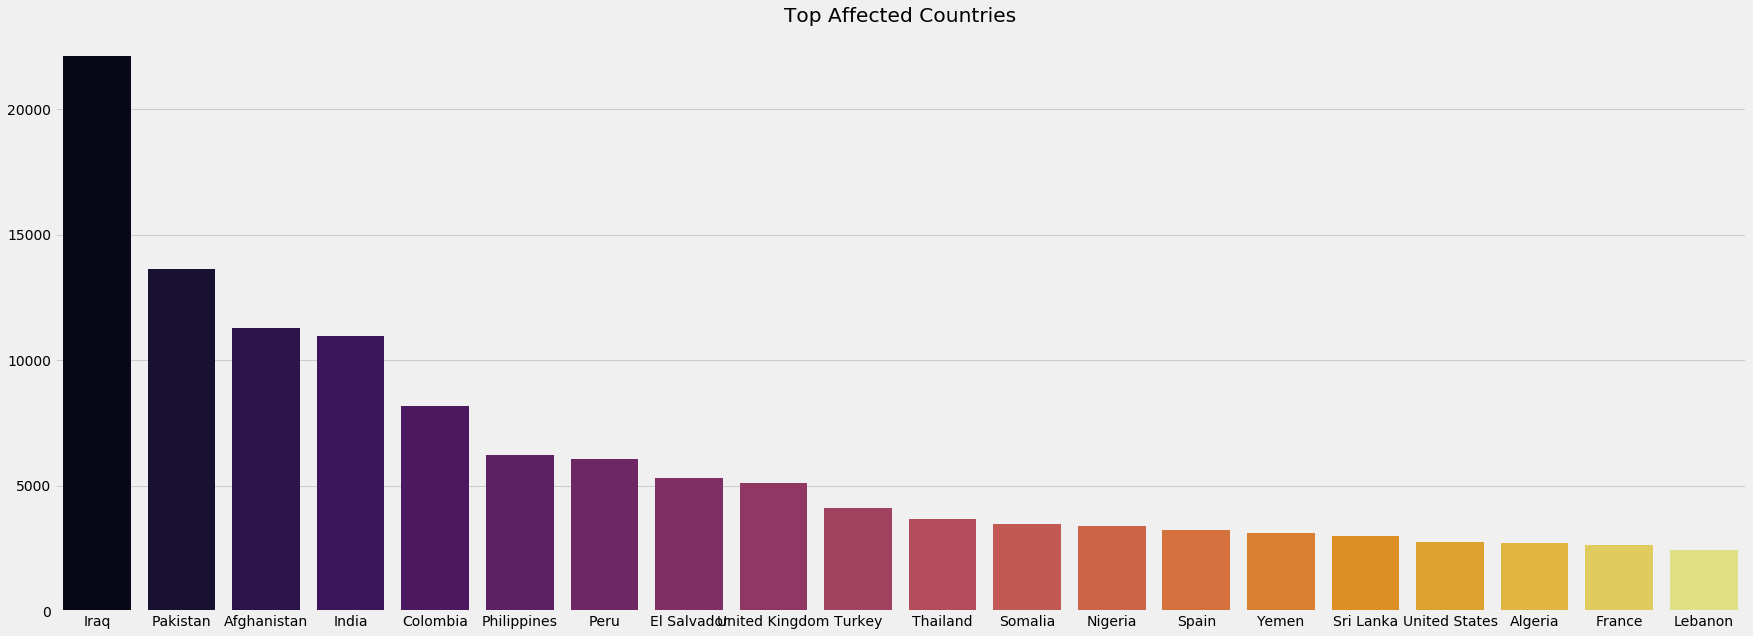

In [21]:
plt.subplots(figsize=(27,10))
sns.barplot(terror['Country'].value_counts()[:20].index,terror['Country'].value_counts()[:20].values,palette='inferno')
plt.title('Top Affected Countries')
plt.show()

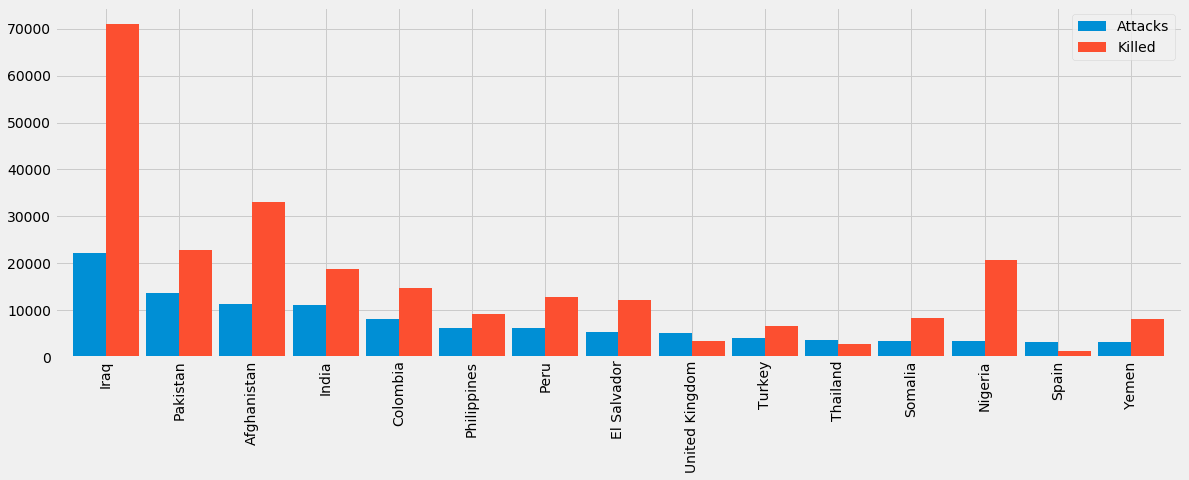

In [22]:
coun_terror=terror['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=terror.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

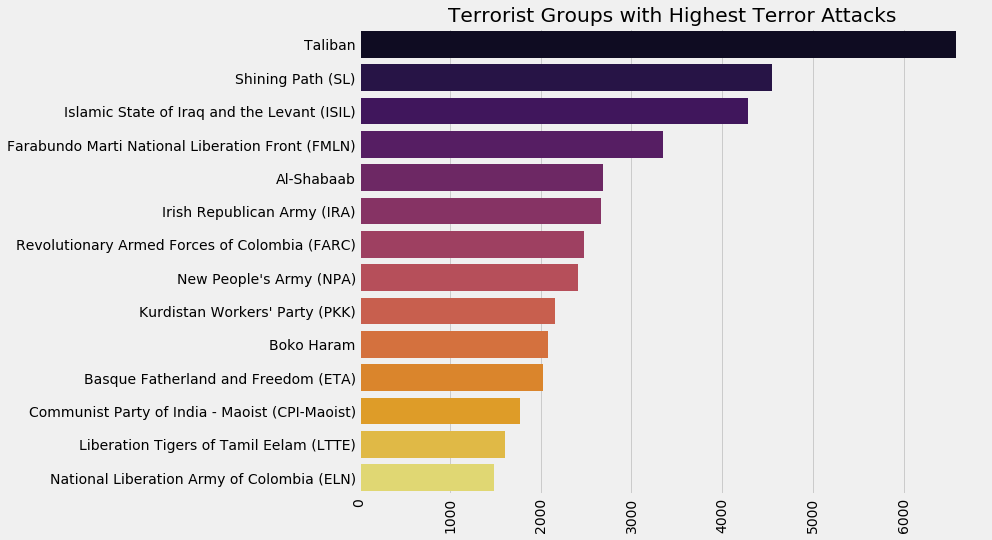

In [23]:
sns.barplot(terror['Group'].value_counts()[1:15].values,terror['Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

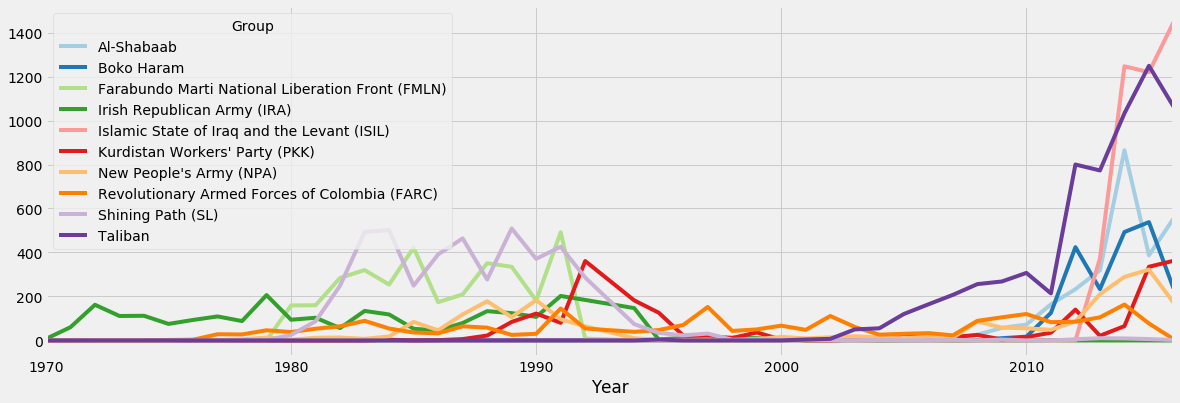

In [24]:
top_groups10=terror[terror['Group'].isin(terror['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

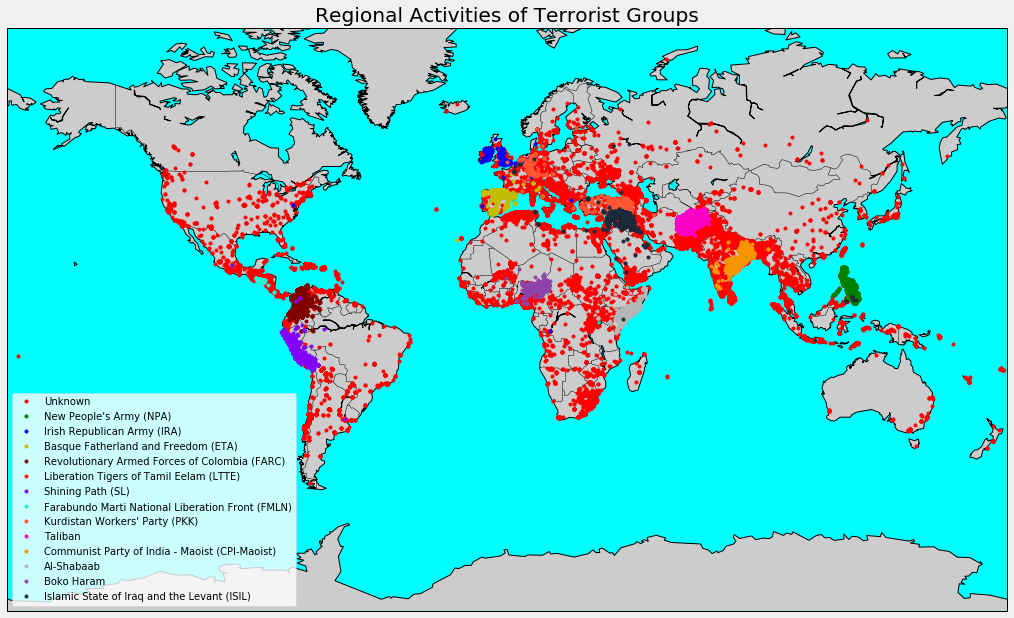

In [25]:
top_groups=terror[terror['Group'].isin(terror['Group'].value_counts()[:14].index)]
m4 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
m4.drawcoastlines()
m4.drawcountries()
m4.fillcontinents(lake_color='aqua')
m4.drawmapboundary(fill_color='aqua')
fig=plt.gcf()
fig.set_size_inches(22,10)
colors=['r','g','b','y','#800000','#ff1100','#8202fa','#20fad9','#ff5733','#fa02c6',"#f99504",'#b3b6b7','#8e44ad','#1a2b3c']
group=list(top_groups['Group'].unique())
def group_point(group,color,label):
    lat_group=list(top_groups[top_groups['Group']==group].latitude)
    long_group=list(top_groups[top_groups['Group']==group].longitude)
    x_group,y_group=m4(long_group,lat_group)
    m4.plot(x_group,y_group,'go',markersize=3,color=j,label=i)
for i,j in zip(group,colors):
    group_point(i,j,i)
legend=plt.legend(loc='lower left',frameon=True,prop={'size':10})
frame=legend.get_frame()
frame.set_facecolor('white')
plt.title('Regional Activities of Terrorist Groups')
plt.show()

In [27]:
terror_india=terror[terror['Country']=='India']
terror_india_fol=terror_india.copy()
terror_india_fol.dropna(subset=['latitude','longitude'],inplace=True)
location_ind=terror_india_fol[['latitude','longitude']][:5000]
city_ind=terror_india_fol['city'][:5000]
killed_ind=terror_india_fol['Killed'][:5000]
wound_ind=terror_india_fol['Wounded'][:5000]
target_ind=terror_india_fol['Target_type'][:5000]

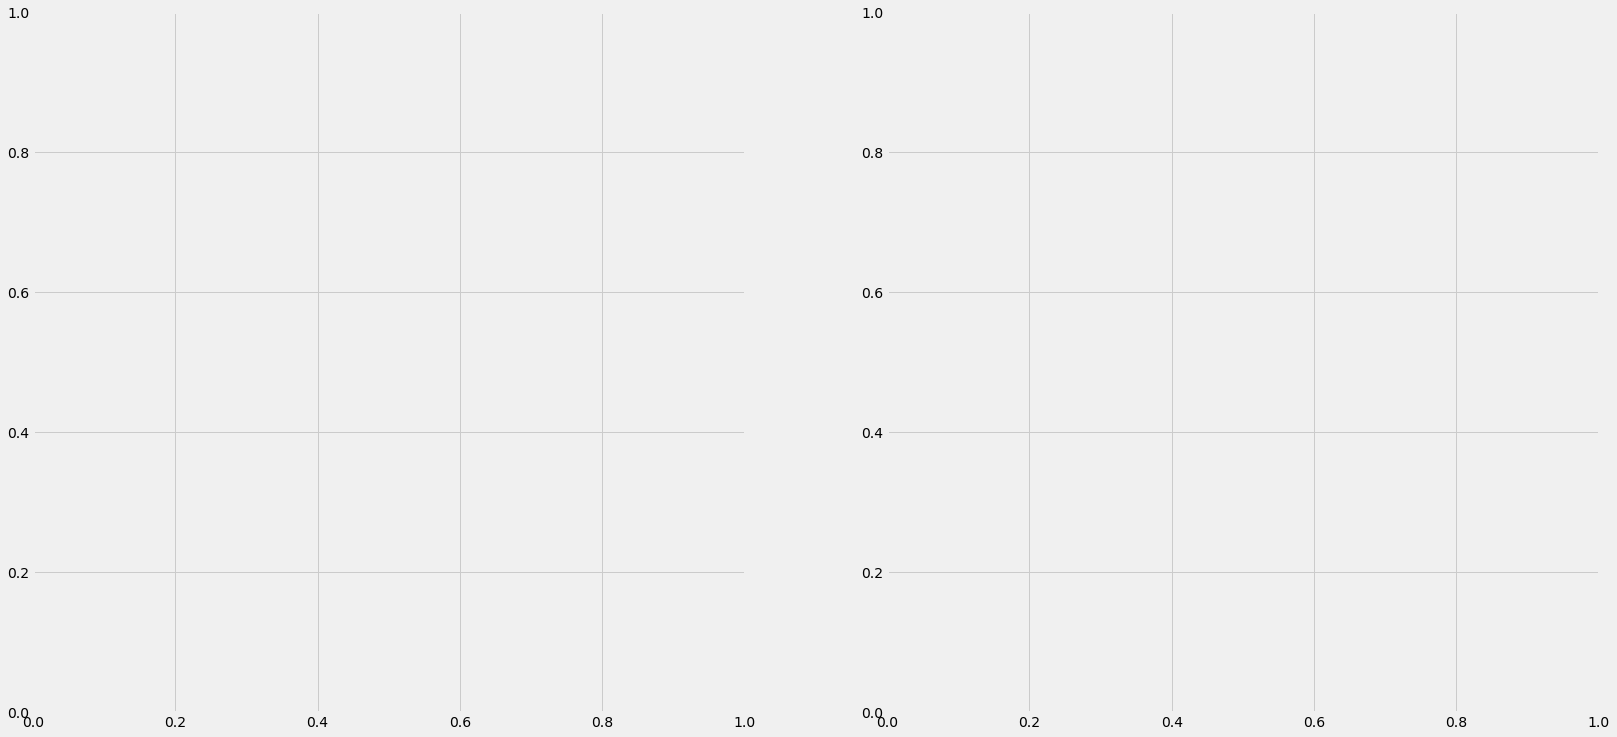

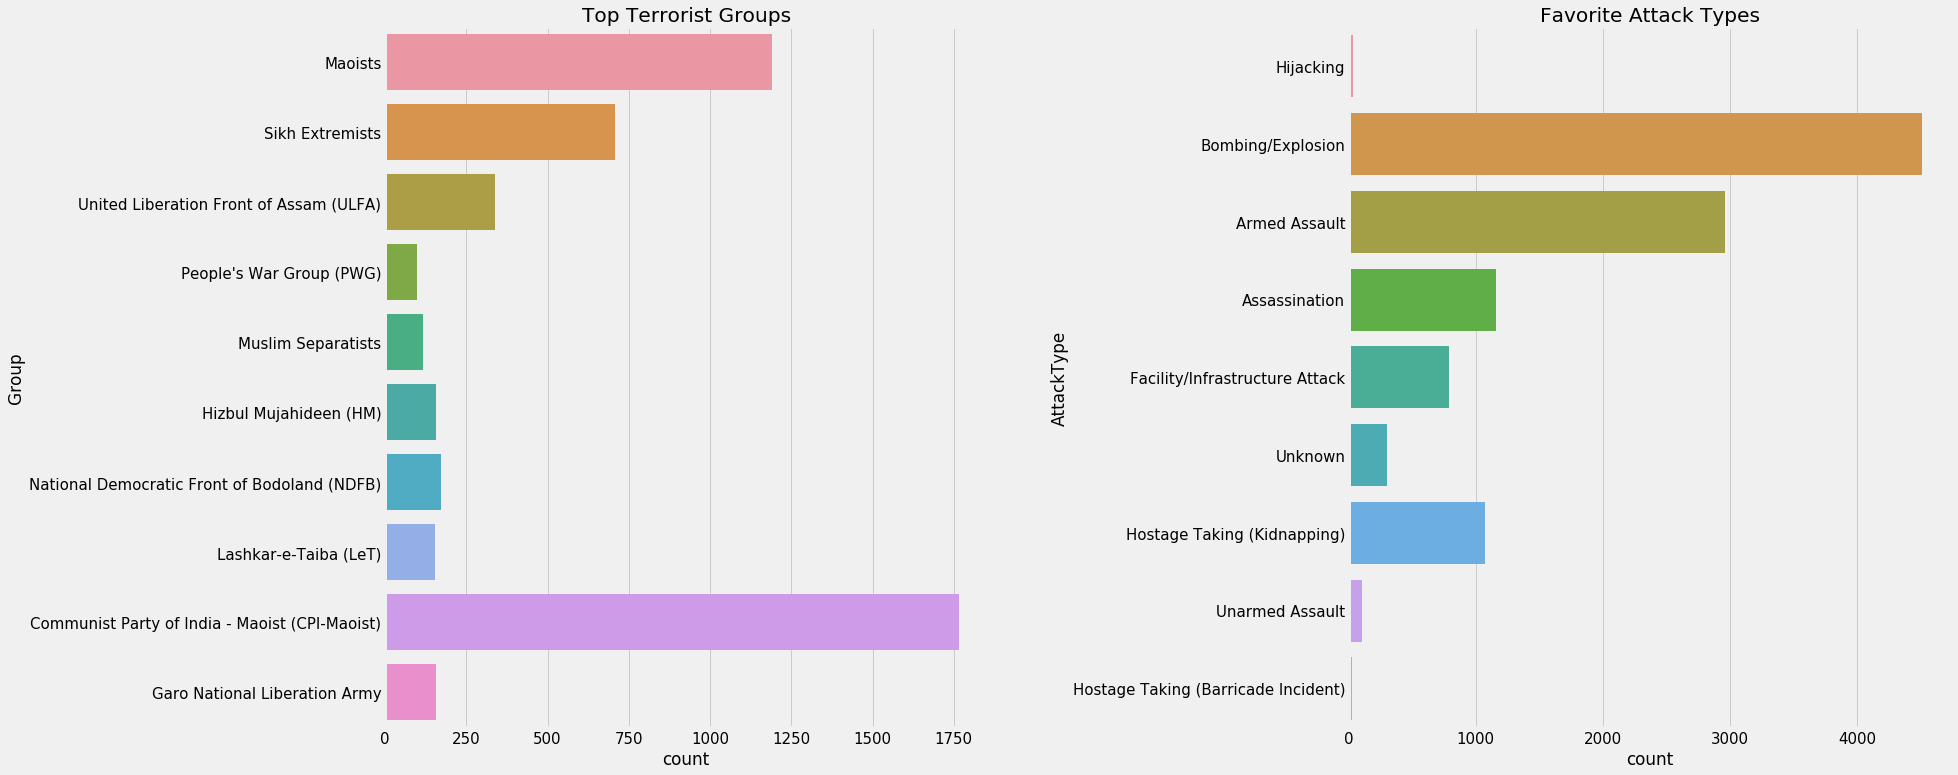

In [28]:
f,ax=plt.subplots(1,2,figsize=(25,12))
ind_groups=terror_india['Group'].value_counts()[1:11].index
ind_groups=terror_india[terror_india['Group'].isin(ind_groups)]
sns.countplot(y='Group',data=ind_groups,ax=ax[0])
ax[0].set_title('Top Terrorist Groups')
sns.countplot(y='AttackType',data=terror_india,ax=ax[1])
ax[1].set_title('Favorite Attack Types')
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()


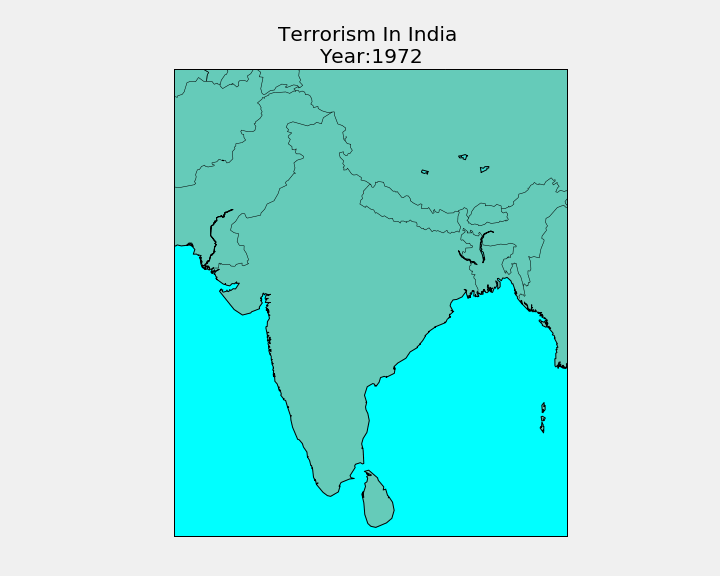

In [29]:
fig = plt.figure(figsize = (10,8))
def animate(Year):
    ax = plt.axes()
    ax.clear()
    ax.set_title('Terrorism In India '+'\n'+'Year:' +str(Year))
    m5 = Basemap(projection='lcc',resolution='l',llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77)
    lat_gif=list(terror_india[terror_india['Year']==Year].latitude)
    long_gif=list(terror_india[terror_india['Year']==Year].longitude)
    x_gif,y_gif=m5(long_gif,lat_gif)
    m5.scatter(x_gif, y_gif,s=[killed+wounded for killed,wounded in zip(terror_india[terror_india['Year']==Year].Killed,terror_india[terror_india['Year']==Year].Wounded)],color = 'r')
    m5.drawcoastlines()
    m5.drawcountries()
    m5.fillcontinents(color='coral',lake_color='aqua', zorder = 1,alpha=0.4)
    m5.drawmapboundary(fill_color='aqua')
ani = animation.FuncAnimation(fig,animate,list(terror_india.Year.unique()), interval = 1500)    
ani.save('animation.gif', writer='imagemagick', fps=1)
plt.close(1)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

In [30]:
terror_usa=terror[terror['Country']=='United States']
terror_usa_fol=terror_usa.copy()
terror_usa_fol.dropna(subset=['latitude','longitude'],inplace=True)
location_usa=terror_usa_fol[['latitude','longitude']]
city_usa=terror_usa_fol['city']
killed_usa=terror_usa_fol['Killed']
wound_usa=terror_usa_fol['Wounded']
target_usa=terror_usa_fol['Target_type']

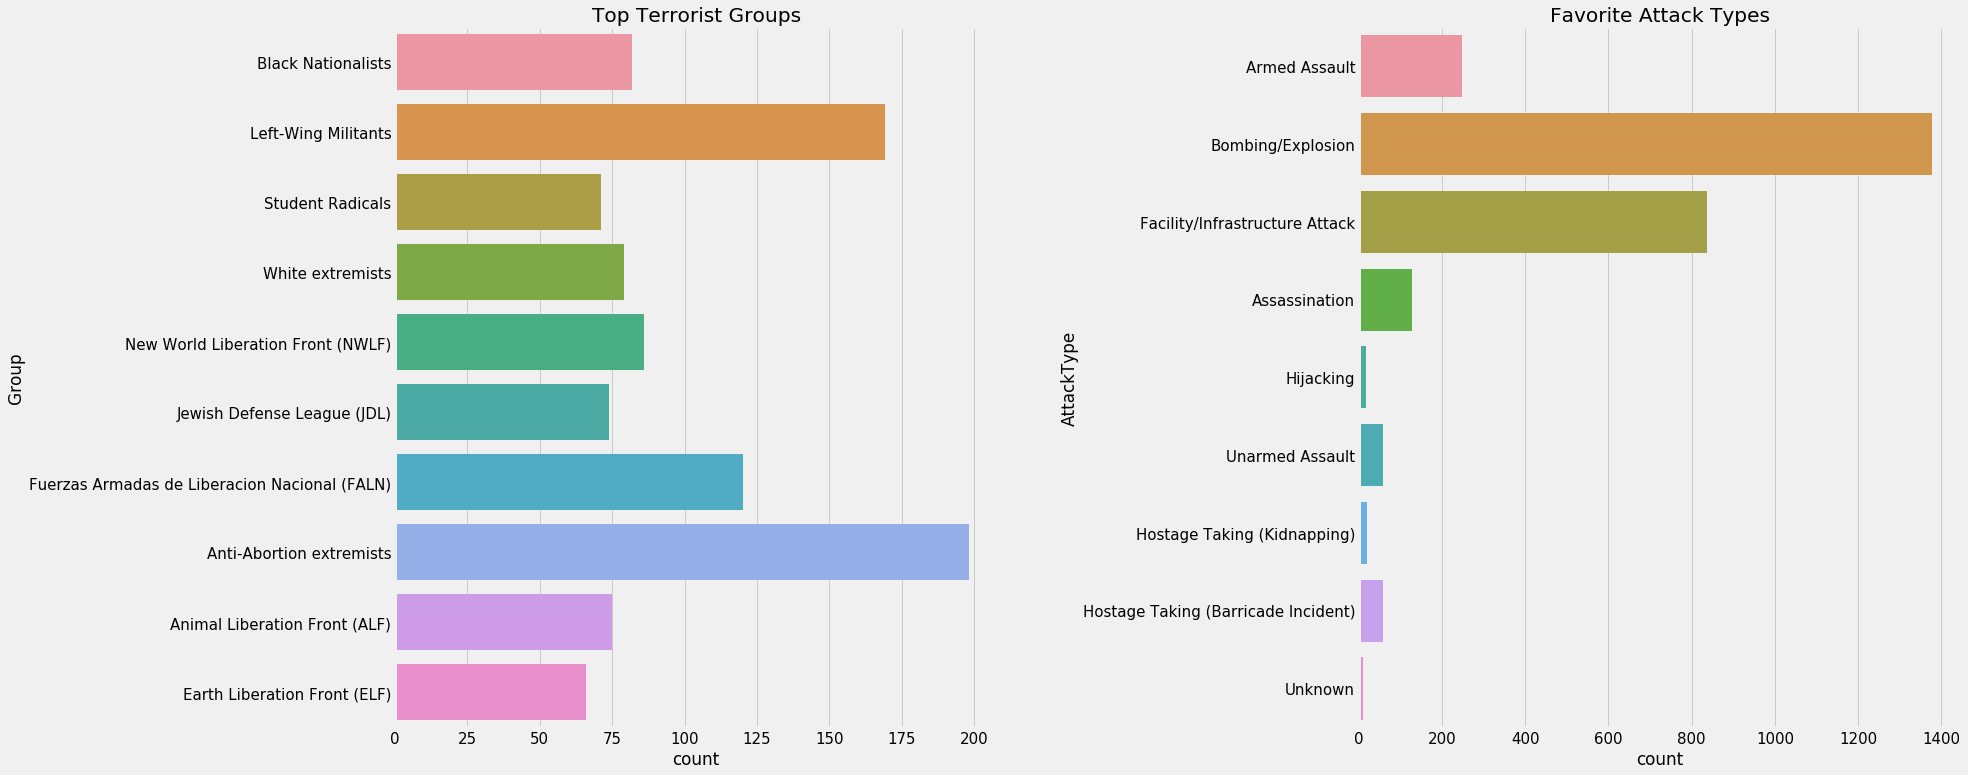

In [31]:
f,ax=plt.subplots(1,2,figsize=(25,12))
usa_groups=terror_usa['Group'].value_counts()[1:11].index
usa_groups=terror_usa[terror_usa['Group'].isin(usa_groups)]
sns.countplot(y='Group',data=usa_groups,ax=ax[0])
sns.countplot(y='AttackType',data=terror_usa,ax=ax[1])
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].set_title('Top Terrorist Groups')
ax[1].set_title('Favorite Attack Types')
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()


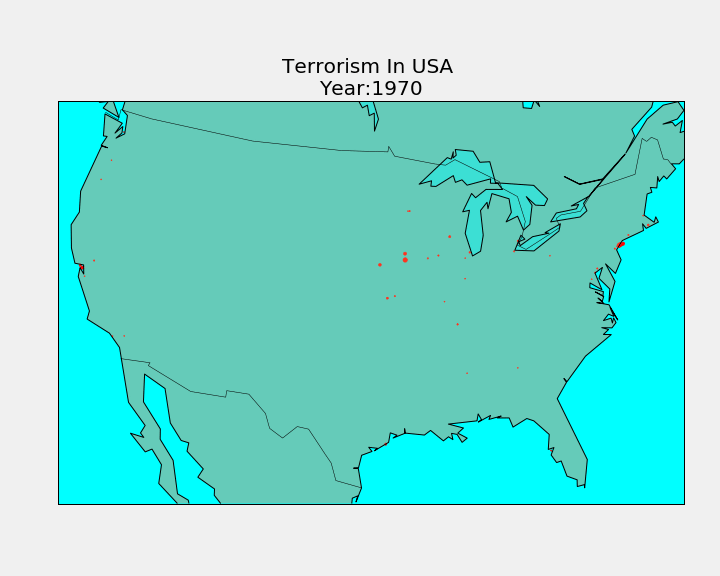

In [32]:
fig = plt.figure(figsize = (10,8))
def animate(Year):
    ax = plt.axes()
    ax.clear()
    ax.set_title('Terrorism In USA '+'\n'+'Year:' +str(Year))
    m6 = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
    lat_gif1=list(terror_usa[terror_usa['Year']==Year].latitude)
    long_gif1=list(terror_usa[terror_usa['Year']==Year].longitude)
    x_gif1,y_gif1=m6(long_gif1,lat_gif1)
    m6.scatter(x_gif1, y_gif1,s=[killed+wounded for killed,wounded in zip(terror_usa[terror_usa['Year']==Year].Killed,terror_usa[terror_usa['Year']==Year].Wounded)],color ='r') 
    m6.drawcoastlines()
    m6.drawcountries()
    m6.fillcontinents(color='coral',lake_color='aqua', zorder = 1,alpha=0.4)
    m6.drawmapboundary(fill_color='aqua')
ani = animation.FuncAnimation(fig,animate,list(terror_usa.Year.unique()), interval = 1500)    
ani.save('animation.gif', writer='imagemagick', fps=1)
plt.close(1)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

In [45]:
kaggle=b'/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAJYAlgDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAK83+Oelf2n8Lr6RV3SWMsd0o+h2sfwV2NekVn67piazoGo6XJjbeW0kBz23KRn9aAPhCinSI8UjRyKVdCVZT1BFNoA9T/AGf9UFj8SltWI239pLCM/wB4YkH/AKAfzr6sr4d8F6t/YfjbRdSLbUgvIzIf9gsA3/jpNfcVABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHxZ8TdI/sT4k69ZhdqG6MyAdAsmJAB9A2Pwrk69m/aO0n7N4v03VFXC3toYyfV425/R1rxmgAr7i8Gat/bvgrRtT3Ze4tI2kP8AtgYb/wAeBr4dr6p/Z91b7d8OTZM2X0+7kiA9FbDg/mzflQB6tRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHj/7RWmfavAtnqCrl7K9XcfRHUg/+PBK+YK+6PE3h2y8V+HbzRNQMgt7pQGaMgMpBDAjPcECvnb41fDjT/B1rot7ots8dkyG1uHZtxaUfMrN/tMN3Tj5egoA8gr6f+BXgvX/AArZ395qghjtdThhlhiWTc4I3EEgcDhvX09K+YK+5PB14uoeCtDu1ORLYQsfY7BkfnmgDbooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBskiRRtJI6pGgLMzHAUDqSa8G+JXxM8LeNfDeqeGtMN5Ldxj7RBcmICFzF87YJbd9wPj5a9o8RmxHhnVP7TlMVgbSVbhx1WMqQx+uM18KBipypIOCOPegBK+jvhN8UvDejfDu30/XtWS0uLKV4lRkd2ZCdykBQTj5iPwr5xooA+pdR/aG8HWoItIdSvW7GOEIv5sQf0rkdS/aVvX3DS/DtvF/de6uGkz/wFQv8AOud+Dvw50Hx6uqSatdXiyWTx7Ybd1QMrBuSSCf4T0xXb+NP2fLe7WyPg5rayMastyt7PIRJ0wwOG56gjAHSgDzrUvjn471DcI9SgskbqtrbqP1bcw/Oui+E/xZ8Qv4wtNG1y/l1Cz1CTylabl4pD90g9cE4BB9cj34Tx38PNU+H9xYw6lcW0/wBsjZ0e3LFQVIBHzAeo/OvQvgB4Ee81I+Lr6PFralo7JWH+skxhn+igkfU+1AH0fRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBU1XT4tW0i902fPk3cDwPj+6ylT/OvCPEXwu+Hfw/8ADaTeJNQ1O6vJSfJMB2NMy4JRVAIUHuWPfg9K+gq8E/aU1Ira6Fpf2YbXeS488/7IC7R/31k/hQB8+NjcdoIXPAJyaSiigD1z9njVvsXj+fT2b5L+zdQPV0IYf+Oh6+jdc8TaJ4bgWXWNTtbMMCUWWQBnwOdq9T+FfGXg/X/+EX8X6XrRR3S0nDyKn3mQ8MB7lSam8beLr3xt4muNXuxsVvkggzkQxjoo/mT3JNAHWSyar8b/AIoqi+ZDYDgDqLW2U8n03HP4swHSvqbTNNtNH0y206whENrbRiOKMdgP5n3r5+/Zy8QWFpqWp6HOkUd5eBZYJjw0m0HMefbO4D/er6MoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvOPjXqeh6d4CuV1a0W5ubpXt7H92paOUrneCfugYBOOvAr0euM+J3hXS/FHg27OpiYf2fFJdwvC4VgyoTjkEYPfigD4zooooAK1pvDWrw6Da639ilfTbgMVuY1LIhVipVyPunIzg9iKya0rHxFrWl27W1hq19bW7gh4Yp2WNgeoKg4Oe+RQBQhmlt5o5oJHiljYMjoxVlI6EEdDXt/wAMvjlNYNFo/i6eS4tScRai5LyR57Sd2X/a6j3HTyq88L3cHhLT/EsP76wuZHglYD/UTKx+VvqoDA+5HbnCoA++re4hu7eO4t5UmhkUMkkbBlYHoQR1FS18a+Cfij4i8DnybKZbnTyctZXOSgPcqeqn6ceoNfSHgD4paL4+Vre3SSz1OKPfLaSkHI6Eo38QHHYHnpQB3VFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRR0rzTxV8cPCnhudrW3kk1W7UkMlmQUQ+hc8flmgD0uivlbxD8fvFuqzMNLMGkW2flWJBJIR7sw/kBXH3fxF8Z3rZm8UaqPaO6aMfkpAoA+2aK+LbL4n+OLBgYfE+otj/AJ7y+d/6Hmu/8N/tF6vZqsPiHTotRTPNxARDJj3XG0/htoA+k6K5Xwj8RPDnjWL/AIlV7i5Ay9pOAky/8BzyPcEiuqoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvmX47eOdZuPFF34Ujka20u1Ee+NDg3BZA+WI6qN3A6cZPPT6ar5h/aK0v7L45stQVcJe2YDH1dGIP/AI6UoA8eooooAKKKKAPRPDV5qmo/B/xR4f063+0eVdQXsydWWHneyj2aOPPsTXndelfAzVBYfEmCzdsQ6lby2j5AI6bxweOqAfjXF+JPD974W8QXmj6gm2e2cruxgSL/AAuPYjmgDJq9o+sX+gatb6pply1veW7bo5FAOOx4PBBHGDVGigD73sPtP9nW32xla68pfOKjAL4G7A7c5qxXz74L/aD8uPS9J8Q6cCBtgm1NJ8YHQOybfpk7vU47V9AghlDKQQRkEd6AFooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACsPxT4u0bwdpTX+sXSxJyI4l5klb0Ve5/Qd6o+PPHem+A9DN9efvbmXK2tqpw0zj+SjjJ7fUgV8ieKfFOqeMNcm1XVZt8r8JGv3Ik7Ko7Afr1PNAHT+Ovi54g8Y3MsMU8unaSflWzgkI3r/00YfeJ9Ont3rz6iigAooooAKKKKAHxSyQTJNDI8cqHcroxBU+oI6V7R4A+Pd9phi07xZ5l9Z8Kt6ozNGP9r++Pf73Xr0rxSigD7z0zVLHWtPhv9Nuorq0mGUlibIP+B9jyKuV8W+A/iBq3gPVhcWTmWylYfabN2+SUf+ysOxH6jivrnwv4n03xfoMGr6XKXgk+VlYYaNx1Rh2I/wACODQBs0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV4t+0hpf2jwnpWpquWtLsxH2WReT+aL+de01xnxY0s6v8L9egVcvFb/AGhfUeWQ5/RSPxoA+M6KKKACiiigDR0HVH0TxDp2qR53WdzHPgd9rA4/HFfXnxA8EWHxA8LPCBGL1U82xuscq2MgE/3W6H656gV8ZV9n/CzWP7b+Gmh3RbMkduLeT13RnZz9doP40AfG95Z3Gn3s9ndwtDcwSGOWNxgqwOCDUFezftAeC59O8RDxVbgvZaiVjmwP9VMqgD8GC5+ob2rxmgCW3t5ru5itraF5p5WCRxxqWZ2PAAA6mvs34aafrWlfD/S7LX2Y38UZBRjlo0ydiE9yFwPbp2r4ytrmazuobq2laKeFxJHIpwVYHII/Gvs34c+NIfHHhK31EFVvI/3V5EP4JQOTj0PUfXHY0AdbRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVieKvFeleDtEk1XVpikSnbGijLyvjhVHqcfQd62JZEhieWV1SNFLMzHAUDqSa+Pvir48fxz4paS3ZhpVnmKzQ9x3kI9Wx+QAoAw/GPi3UPGniGfVtQbBY7YYQflhjB4Uf49zk1gUUUAFFFFABRRRQAUUUUAFFFFABXb/DT4hXfgLXhKd8ulXLBby3HcdnX/AGhn8enuOIooA++LO7t9QsoLy0lWa2njWSKRTw6kZBH4VPXiP7PHi5r7R7vwxcvmWx/f22T1iY/Mv4Mc/wDA/avbqACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKhu7aO9s57WYZinjaNx6qwwf51NRQB8EXtpJYX9xZzcS28rRP8AVSQf5VXrt/i7pf8AZPxR1yILhJ5hcqfXzFDn/wAeLD8K4igAooooAK+j/wBm7WPO0DWNGdvmtrhbhAf7rrg4+hT/AMer5wr1L4Bax/ZvxJjtGbEeo20kHPTcPnH/AKAR+NAH0t4n8P2vijw3f6LdgeVdRFQ2M7G6qw9wQD+FfEWp6dc6Rql1p17H5dzaytFKvoynB/D3r70r55/aH8GmK6tvFtpH8kuLe92jowHyOfqBtP0X1oA8GrufhX45fwP4tjmmdv7Lu8Q3iDsvZ/qp5+mR3rhqKAPv2ORJY1kjdXjcBlZTkMD0INOrxj4BeOv7W0V/C9/Lm809N1qWPMkHTb9VPH0I9DXs9ABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHjfx/8Z/2T4fj8NWjst3qa75mU42wA9P8AgRGPoG9a+ZK9Y/aGJPxJiyc40+LH/fT15PQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBu+DvEU/hXxZp2sQyMqwTL5wX+OInDr+Iz+lfcKsGUMpBUjIIPBr4Br7d8BXzaj8P/D905y72EIc56sFAP6g0AdFRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHzZ+0jpfkeJ9I1RVwt1aNCxA6tG2f5OPyrxOvqH9ojSxd+ArW/UfPZXikn0RwVP67K+XqACiiigArU8Oaq2heJtM1VSf8ARLqOYgdwrAkfiMisuigD79R1kRXRgysMgjoRVLW9HtPEGiXmk36b7W7iMbjuM9CPcHBHuKwPhhrH9ufDbQ7wtukW2EEh77o/kJP125/GuuoA+GPFPhy88KeI7zRr5f3tu+FfGBInVXHsRzWPX1R8cPAX/CTeHP7asId2qaYhYhRzNB1Zfcj7w/Ed6+V6ANPw/rl54a1+z1iwfbcWsgdQejDup9iMg/Wvtfw5r9l4o8P2es6e+be5j3AHqjdGU+4OQfpXwrXr/wACfHv9ga6fDt/LjTtSkHksx4in6D8G4H1C+9AH1BRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHzh+0jo5h17R9ZUHZc27WznsGRtw/MP/wCO14fX1r8dLPTbn4Y3k1+SsttLHJaMvXzSduPoQWz+favkqgAooooAKKKKACiiigAooooAKKKKACiiigAr7W+G1rJZfDbw9DKMP9hjcj03DcP0NfHGh2Uep6/pthNIY4rq6ihdwMlQzAE/rX3bFEkEKRRIEjRQqqOgA4AoAfRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHL/ABH0v+2fhzr1kF3O1m8iLjqyfOv6qK+KK+/XRZEZHUMrDBB6EV8Ja7praN4g1HTHzus7qSA577WI/pQBn0UUUAFFFFAH0n+zfrH2jwzq2ju2Ws7lZkB/uyLjA/FCf+BV7ZXyn8AdYOnfEhLJmxHqNtJDgnjco3g/X5SPxr6soAK+TPjP4B/4RDxN9vsYtukaixkiwOIpOrR+w7j2OO1fWdYXjDwvZ+MfDN3o14ABMuYpcZMUg+64+h/MEjvQB8O0oJBBBwR0Iq5q+lXmh6vdaXqERiurWQxyKfUdx6g9Qe4NUqAPrz4QePP+E08KLHdyZ1awCxXWTzIMfLJ+ODn3B9RXodfE/gHxdP4J8W2mrR7mgB8u6iX/AJaRH7w+o4I9wK+0bO7t9QsoLy0lWa2njWSKRTw6kZBH4UAT0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHgX7SmrSLDoWjo2InaS6kX1Iwqfzf86+fa9m/aQnLeNtLt+cJpwf2+aRx/7LXjNABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAEkE0ltcRzxNtkjcOh9CDkV9W/D74zaV40vE0q6t207VWX92jPujnIGTtOBg8E4Pbua+Tq6DwNfWOmeOtEvtTkaOzt7yOSR1/hwcgn2Bxn2zQB9v0U1HWRFdGDKwyrKcgj1p1ABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfInxv0r+zPilqLqMR3iR3SDHquG/8eVq+u6+ev2ldLC3Wg6so5dJbZz/ukMv/AKE9AHgtFFFABRRRQBp+HdWfQfEmm6smSbO5jmIH8QVgSPxGR+NfdEM0dxBHPC4eKRQ6MOhBGQa+BK+yvhLq/wDbPww0Sdm3SQw/Zn9QYyUGfwAP40AdrRRRQB4l8fPAP9paaPFmnRf6XZptvVUcyQ9n+q9/9n/dr5tr79kjSWNo5EV43BVlYZDA9QRXyB8WPAL+B/E7C2RjpN6TLaOf4P70ZPqufyI96AOBr6E/Z78bvNHN4QvpMmJWnsWY87erx/hncP8AgXpXz3V3SNVu9D1i01Sxk8u6tZVljb3HY+oPQj0NAH3lRWR4Z8QWninw5ZazZH9zdRhipPKN0ZT7g5H4Vr0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHzH+0Xpl3F42s9SaF/sc9kkSTY+XerPlc+uCD+NeOV9WftAFP8AhWLbpChN7DtAXO8/Nx7cZOfbHevlOgAooooAKKKKACiiigAooooAKKKKACiiigAooqW1tp727htbaJpZ5nEccajlmJwAPxoA+ufgnqM2o/CvSjO5d7cyW4Y/3Vc7R+C4H4V6DWP4V0KLwz4W03RoQuLSBUcqOGfqzfixJ/GtigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvKv2gtNN78NTdAc2N5FMT7NmP+bivVawvGejHxB4M1jSkXdLc2rrEP+mmMp/48BQB8O0VMlpcyTPClvK0sYYuioSyhfvZHbGDn0xUNABRRRQBteGfCmseMNTfT9EtRcXCRGZwZFQKgIBOWI7sPzr6s+E3hHUvBfgoabqssbXUlw85SNtyxBgoC57/dz+NfK3g7xJceE/FVhrFu7gQSjzkU48yIn51Prkfrg9q+3oJ4rq3iuIHEkMqB0cdGUjIP5UASUUUUAFc7438I2fjXwxc6Rd4R2G+3mxkxSj7rfTsR3BNdFRQB8Garpl3ouq3WmX8RiuraQxyoexH8x3B7iqdfSXx6+H/9p6f/AMJZpsObu0Tbeoo5kiHR/qvf/Z/3a+baAPXfgT47bQfEQ8PXsuNO1OQCIseIp+in6Nwv12+9fUVfAKsyOroxVlOQQcEGvsv4XeL/APhMvA9nezSq1/CPIvAOvmL/ABH/AHhhvxPpQB2dFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHif7Rmvx23h7T9B+z75LyU3HmnpGI+OPc7vyB9a+bK+of2hPDj6p4Lt9Xgj3TaXNufHURPgN+TBPwzXy9QAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVueD9bi8OeMNK1ieEzQ2lwskiDqV6HHuAcj3FYdFAH31a3MN7aQ3VtIJIJ0WSN16MpGQR9QalryH4AeLP7Y8JS6FcSZutKYCPPVoWyV/I5H02169QAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBz3iPTbe28M+IbrT7S3t7+ewnzPFCod22NgkgZbn1r4hr75u4UuLKeCUgRyRsjE9ACMGvjDxPpHhjQ7OOy07WZdY1cOPPuIFCWkY5yqkjMhzj5gQOPyAOVooooA9A+HPhfwlrFvf6h4w1xdOtYGWO3iW4RJJmwSx2kFiANvQcluvGK9a/wCF4+B/C+k2mk6NHqWpQ2kSwxME2jaowMs5B/8AHa+ZaKAPoi9/aVsltl+weHLh5yORPcKqqfwBJ/SovB37Qd1qXiaGx8RWNjbWNy4jjntwymFicAvuYgr2J4x1r58p7RSJGkjIwR87GI4bHXFAH35RXJ/DXXz4l+Huj6hI5efyBDOWOSZE+Rifc4z+NdZQA10SSNo5FVkYEMrDIIPY18h/FrwA/gjxMz2kTf2PekyWrdRGf4oyfbt7Ed819fVgeMvCll4z8M3Wj3oC+YN0MuMmKQfdYf19QSKAPh+vQ/g945/4Q3xesd3Jt0rUNsFzk8RnPySfgSc+xNcXrWj3ugaxdaVqMJiu7aQpIvb2I9QRgg+hqhQB9/8AWivLfgf44bxR4VOl3sm7UtLCxlieZYv4G+oxtP0B716lQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBwfxl1M6Z8LNZZcb7hEtlz/ALbAN/47ur48r66+OFo938KtTMcZdoXilOOwDjJ/ImvkWgAooooAKKKKACiiigAooooAKKKKACiiigAooooA9Q+AU5i+KEEe8qJrWZMD+Ljdg/ln8K+r6+NvhNrdroHxL0i8vMiB3a3Zh/AZFKAn2BIz7V9k0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRSMyqMswGTgZPc0tABRRRQAUUUUAFFFcR8S/H8Xgfw1Jd2ptbjUnkWKG3kk6E5yzKDnAAP44oA7eivi+T4o+NX1w6uPEF2t10CqR5QHp5ZGzH1FU9X8e+LNd3DUfEF/KjdY1lMcZ/wCALhf0oA+jfjX4sstL8Aajp1vqEH9pXhW3ECSgyBScuSoOQNoI/Gvk+iigAooooAKKKKAOq+HvhODxr4vt9Fub5rOOVHfeqBmbaMlRk9cZ59ulenfHLwTp/hzwX4bOkwGO2sZpLVieWfzBv3Me5yjf99fSvKvAWrDQ/Huh6izbY4rtBI3ojHa//jrGvqP4waT/AGv8LtajVcyW8YukPp5ZDN/46GoA89/Zt13dbazoEjcoy3kI9j8j/wAk/Ove6+OPhFrv9gfEvSZnfbDcyfZJfQiT5Rn2DbT+FfY9ABRRRQB5X8ZfhqPF2k/2vpcI/tqyT7qj/j5iHJT/AHh1X8R3GPlUgqxVgQQcEHtX39Xzp8dPhp9imk8XaPB/o8rZ1CFB/q3P/LUexPX357nAB5d4G8WXHgvxZZ6xDuaJG2XEQP8ArYj95fr3HuBX2pZXtvqVhb31pKsttcRrLFIvRlIyD+VfBFfRH7Pfjfz7abwhfS/vIQZrEseqdXT8D8w9i3pQB7vRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAFTU7WzvtKu7XUFRrKaFknDnA2EfNk9uO9fCV4lvHfXCWkrS2yysIpGGC6Z4JHYkYr6V+O3j9NF0R/C9i+dQ1CL9+yn/Uwk8j6tgjHpn1FfMdABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAoJVgykgg5BHavu/Q706l4f02/Ygm5tYpiR/tID/AFr4Pr7N+FF4b74W+H5mOStt5Oc5+4xT/wBloA7KiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD5A+L3inUtc8d6rYz30smn2N00MFvnCIV+UnA6nIPJ5rg4p5oM+VK8e7rsYjNdT8T4o4fid4iWNQqm9diB6nkn8SSa5KgDRi8Qa1blTDq9/HtGF2XLjA/A1ow+PvGFuMR+KNYAAwA17IwA9gTxXO0UAdbH8UPHEa7V8T6gR/tSbj+ZpknxL8bSNubxPqYP8AszlR+QrlaKANe98V+ItSBF9r2p3Kn+Ga7kYfkT71kUUUAFFFFABRRRQAUUUUAFFFFAB0r7g0C7i8V+A7C4nO9NR09RNz3ZMOPzyK+H6+rPgDq39ofDZLRmy+n3MkGD12nDj/ANDI/CgD5durefS9UmtnJS4tZmjJHBDK2P5ivt7wtrSeIvCul6uuP9LtkkYDs+PmH4NkfhXyl8YtJ/sj4o6wiriO5dbpD6+YAzf+Pbq9i/Z2137d4MvNHdsyadc5QekcnzD/AMeD/nQB7FRRRQAVFcW8N1bS29xGssMqFJEcZDKRggj0qWigD4++Knw8m8CeIM26s+j3hL2kp52esbH1Hb1GD6447SNVu9D1e11Swl8u6tZBJG3uOx9QehHoa+2fFPhqw8XeHrrR9RTMUy/K4HzROPuuvuD/AFHQ18Y+KPDd/wCE/EF1o+opiaFvlcD5ZEP3XX2I/wAKAPszwn4ltPF3hmz1qz4S4T5485MbjhlP0P58HvW3Xyv8DfHf/CN+Jf7Fvptul6m4UFjxFP0VvYH7p/4D6V9UUAFFFFABRRRQAUUUUAFFFFABWT4m1628MeG7/WrvmK0iL7c4Lt0VR7kkD8a1q8/+M2gaj4i+HV1b6YjS3EEqXJhT70qrnKgdzznHfHrigD5P1vWL3xBrV3quoSmW6upC7t2HoB6ADAA9BVCjpRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfZnwmsjYfCzw/CRjdbGb/v4zP/AOzV8faZp8+rarZ6dbDM93MkEYP95iAP5191abYRaXpVnp0H+ptYEgj/AN1VCj9BQBaooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+MPip/yVDxD/ANfZ/kK4+uw+Kf8AyVDxD/19n+Qrj6ACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr3L9mzVvK1rWtHZuJ7dLlAfVG2n/wBDH5V4bXc/CDVv7I+KOiyM2I7iU2rj18wFVH/fRWgDu/2k9J8vVtE1hV/10D2zn02NuX897flXN/AXXf7J+I0dlI+2HU4Xtzk8bx86n6/KR/wKvX/j7pP9o/DOW6Vcvp9zHcZ74JKH/wBDB/CvlvS9Qm0jV7PUrf8A11pOk8f1VgR/KgD70oqvYXkOo6fbX1u26C5iWaM+qsAR+hqxQAUUUUAFcD8VPh3D470DNuqx6zaKWtJTxv8AWNj6Hsex59c99RQB8DXNtcWN3La3MTw3ELlJI3GGRgcEEetfWnwe8df8Jl4TWG7l3atp4WG5yeZF/hk/EDB9wfWsL4zfCv8A4SO2k8RaHB/xN4V/fwIObpB3A/vgfmOOoFeEeA/F1z4I8W2urRhmhU+XdQj/AJaRH7w+o6j3AoA+2aKr2V7balYwXtnMs1tcRiSKRTwykZBqxQAUUUUAFFFFABRRRQAUUUUAfGfxV0GTw/8AEjWLdo9sNxMbuA4wCkh3cewJZf8AgNcZX1z8XPh0vjjQftFkgGtWKlrY5x5q9TGfr29D7E18kzQy288kE0bRyxsUdHGCrA4II7EUAMooooAKKKKACiiigAooooAKKKKACiiigAooooA9N+A+jRat8TIZpvu6fbPdqP7zAqg/Ivn8K+sq+aP2bpAPGOrR5X5rDOO/Ei/419L0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHxJ8QYpIviN4kWVSGOp3DAH+6ZGI/Qiubr0H4y6HqOl/EbU7u8tmjtr+Uy20v8Mi4GcH1HcV59QAUUUUAFFFFABRRTkR5HCIrMzHAVRkmgBtFKysjsjqVZTggjBBqexsLzU7yOzsLWa6uZDhIYULu3GeAOelAFeirF5Y3en3Bt721ntp16xzxlGH4Hmq9ABRRRQAUUUUAFT2d1LY3tvdwnEsEiyofRlOR/KoKKAPuDWraLxb4DvYIRuTU9PYw/V0yh/Mg18QEEEgjBHUGvsL4Oat/a/wALtHZmzJbI1q4z02MQo/752/nXzB8QNJ/sP4ga7p4Xakd27xr6I53r/wCOsKAPpD4F69/bPw2trZ2zPpsrWr+u37yH6bWA/wCA16XXzN+zpr32LxbfaLI5EeoW++MZ/wCWkfP/AKCW/KvpmgAooooAKKKKACvC/jB8H/t4n8S+Grf/AEvl7yyjH+u9XQf3vUd+o56+6UUAfNnwQ+Jg0e5TwprMuLCd/wDQ5nPEEhP3D/ssenofrx9J14h8XPg4mqJceIvDNvt1DJkurNBxP6sg7P3I/i+vW58FfiaddtV8M61NjVrZMW8sh5uI1HQ56uoH4jnsaAPY6KKKACiiigAooooAKKKKACvj/wCNVmLP4sa0Fi8uOYxTL/tbol3H/vrdX2BXzn+0npKRaxomrpHhriGS3kYd9hBXPv8AOfy9qAPDKKKKACiiigAooooAKKKKACiiigAooooAKKKKAOq+HHiJvC/j3SdSL7YPOENxzx5T/K2fpnP1Ar7Vr4Ar3P4T/Gh7FodA8VXLSWrEJbX8jZMPosh7r6N278dAD6MopAQyhlIIIyCO9LQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBVvdOsdSiWK/sre6jU7lSeJXAPrgisubwR4TnJMvhjRnJGMtYRZx9dtb1FAHIT/C7wNcff8M2AyMfu0Kf+gkVTk+DXw/lUBvDsYwc/LcTL/J67uigDzl/gZ4AZyw0iZAf4VvJcD82qeD4KfD6DB/sASMB1kupmz+G/H6V39FAHLWvw28FWf8AqvC+ln/rrbrJ/wChZres9M0/Txiysba2HpDCqfyFW6KAPmz9oTwfFpusW3ia1CJFqB8meNUx+9AJ3Z/2h+qk967n4HeCtF03wvZ+J4C1zqN/EQ0smMQgMVZEHbleT1OO3StX436T/anwu1B1XdJZPHdJ/wABO1v/AB1mrwW18e6ppnwjh0HTruS2kOoyiWSJ9riEorBQRyAWL5+n1oA+hPil4PHjrwhPY2P2d9UtZFlty7DKnOGXPbIz7ZA9K+PCCrFWBBBwQe1XtK1rU9D1Bb/S76e0ulP+sicgn2PqPY8VVurh7u7muZdvmTSNI+0YGScnA7UARUUUUAFFFFABRRRQB6d8N/i6/wAP9Du9NbSDqCTXPnp/pPlBMqA38LZ+6v61i/E7xRpnjLxPDrmmwywNPaItzDKOUlUsvUcEbQmD/KuLooA2PCmtt4c8WaXrCk4tLlJHA6lM4YfipI/GvuVHWSNZEYMjAFWB4IPevgKvrn4Ia+dc+GlnHI5afTnazck84XBT8NjKPwoA9GooooAKKKKACiivAPjxqXjTRvEFhf2V7dWmiogWCS0lZR53VvMx39AcjA4/ioA9/rxz4ofCaW/vG8V+Es22twt50kEXy+ewOd6HtJ/6F9etv4V/GC38WpFo2tMlvrirhH6JdYHUej+q/iPQesUAef8Aww+IsfjTTHs78C31+yG27t2G0tjgyAdueo7H8K7qG7triWaKC4hlkgbZMiOGMbYzhgOhx614n8bZtB8M6nY63ptxPp/jEnzIZLRRiRM4JmB4I6gHnPQgjpm/CjxfB4R0q91LxRZasn9tXH2k6v5Blt3AyOSuSDuLk8d/agD6EorloPiT4KuYfNTxRpQUDOJLlUP5Ng1Wn+K/gS3OH8S2Z5x+73P/AOgg0AdlRXnk3xw+H8RAXWnl9dlnNx+aiqcvx98Cx7ttxfSY6bLU/N9M4/WgD0+ivIpP2i/ByPhbHWpB/eWCPH6yCuX8SftHzSK0PhrSPKyOLm/ILD6RqcA/Vj9KAPedT1Sw0awkvtSvIbS1j+9LM4VR7fX2r5t+M3xP0TxpZWmk6NBNKlrcGZryRdgb5Su1V64Oc5IHQcV5t4g8U634pvPtWtajNdyDOwOcKn+6o4X8BWPQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHrvww+NFz4WSLR9fMt3o4+WKUfNLbDsB/eT26jt6V9L6ZqljrOnw3+m3UV1azLuSWNsg/4H2PIr4Lq3Y6nqGmS+bYX1zaSf37eZoz+YNAH3pRXx1YfGLx7p6qkfiCWVB2uIo5SfxZSf1robX9ojxjAR51tpVwvffA6n/x1x/KgD6korwTSv2lYSQuseHpEGeZLOcN/wCOsB/6FXdaP8avA2sSLH/axspW6LexmMfi3Kj8TQB6DRUcFxDdQJPbzRzQuMrJGwZWHsR1qSgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoorB8YeLdO8FeHptY1IsyKwjiiT70shzhR+ROfQGgDQ1nTk1jQ7/AEyTGy7tpIGz2DKV/rXwwW+zwXVlOjLL5inHoy7gQf8Avo/lXq91+0Z4qku52tdP0uG3YERRvG7snod24ZI+mPavI7m4mvLqa6uH3zTO0kjEY3MTkn86AIqKKKACiiigAooooAKKKKACnyRmMgMVOVDDawbgjPbv7dqZRQAV7T+zr4iktfFF5oE0zfZ72AywxluBKnJwOxK7s/7orxat7wTqc2j+ONEv4PvxXkYI/vKx2sPxBI/GgD7hooooAKKKKACqmp6ZZa1ptxp2o2yXFpcJskiccEf0PcEcg1booA+TfiV8K9R8BX39q6W80+jGQNFcKf3lq2flDke+MN/I9eu8E/tBmC2tdO8U2skzhhGdRiIzt6bnXuR3I6+mevv13aW99aTWl1Ck1vMhjkjcZDKRgg18nfFb4YRfD+ezns9QNzY3hZUSbAlRlwTnHBHPUf8A6wDQ8Y6xoHjHxB4numSTUNVnuoNP0GKCQ4IXcrPxwVJIIz1JGOM4+jPCGg/8Iz4R0vRi4drSBUdh0Z+rEe24mvmj4D/2Y3xOtUvoWkuGglNkeqrKFySR/uB8e/6e9eN/ip4d8EK0FxN9s1LHy2VuwLD/AHz0QfXn0BoA3tR8IeG9WB+36Dptwx/iktkLf99YyK8n8b+EPg1ofmLfzNY3fe30+5aSXP8AuHcF/EAV5l4r+Mfi3xQ0kQvTpti3AtrIlMj/AGn+83vzj2rgCSSSTknqTQBq69/wj/23b4eGpG1Gfm1Bk3n8EGB+dZNFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB0Phbxtr/AIOvBcaPfvGhOZLd/mik/wB5en4jB9DX1H8Ofidpnj6zaNVFpq0K5ntGbOR/fQ91/Ud+xPx3V3SNWvdC1a21PTp2hu7Zw8bj19D6g9CO4NAH3lRXOeBvF1r428K2usW4CSN+7uIQc+VKPvL9OhHsRXR0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQA13SONpJGVUUEszHAAHc187fGrx14e8X6EunaLe/aJtOu1lkfG1JFIZDsJ5bBK5wOhyMgGuy/aB1y50vwFFY2zMn9o3IhlYf88wCxXPuQv4Zr5ZoAKKKKACiiigAooooAKKKKACiiigAooqSLzWfy4d5aT5NqZy2T0wOvOOKALGm6VqGs3q2emWVxeXLDIigjLtjucDt717P8Lvgzr1n4qsda8SWcdrZ2h86OB5FZ3kH3Mhc4APzcnsOK6D4K/C3UfDl1/wAJLre62upITHBZfxIrYy0noePu9u/PA9soAKKKKACiiigArk/FXxI8L+Dv3eqaipuu1pAPMl/FR93/AIFiuN+PXjW68PaBaaPpl4be91BiZWjbDrCOuCOV3E4z6Bq+XySzFmJJJySe9AH0n4t/aE0m20mNfC8T3d/Omd9xGUS2/wB4fxN7Dj37V4BfalrHi3XUlv7ua+1C6kWJGkbuTgKB0Ayeg4rKq9aTJYpLMyE3RUCAMvCZ/wCWn1x09znjAyAdn4ivdF8BeIryx8Gy3Mt9Cht5dVmmVvLYjEghUKNp6qWJY9cY6ngJJHlkaSR2eRyWZmOSSepJpvWigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA9Z+Ani46H4xOi3EmLLVgEXJ4WcZ2H8eV9yV9K+pq+A4pZIJo5oXZJY2DI6nBUjkEV9r+AvE48X+C9O1g4E8sey4UdpV+VvoCRkexFAHS0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFc3478Vx+C/CF5rTRCaSLakMROA8jHAB9h1PsDXSV4b+0lrCx6Lo+ipKPMmna5kQHnai7VJ9iXP5e1AHCa/8UJviH4QvNH1+2tLe/t3F5YzwBlRiud0bAk4JQtg55IA6nNeW0UUAFFFFABRRRQAUUUUAFFFFABRRRQAV3Hwj1lNG+JWkGS2gnS6nW1zJGGaMudqsh/hIJHPpkd6xvBvhS68aeJINFtLmC3llVn8yYnACjJxgcnHavozwd8CtA8Maja6nd3VxqV/bOskRcCOJHHIYKOcg8jJNAHqlFFFABRRRQAUUV5j8R/jFpfg6OXT9MaO/1vGPLBzHbn1kI7/7I59cdwDxT45fbf8Ahamo/bDlPLi+zegi2Dp/wLd+Oa4zQfD+qeJtVj03SLOS6un52r0Ud2Y9FHuatQw6/wCP/Fm1TLqGrX8mWdv5nsqgfgAK+uPAfgTTPAmiLZ2aK93IoN3dEfNM4H6KOcDt9STQB5lp/wAK/Dfw18NXHifxc8Wq3ltHuS2I/ceZ/CgU/fJPGTx3xxmvAdR1C41XUrnULt99xcSNJIQMDJPYdh6DtXpvxz8cnxF4n/sSzlzpuluUbB4kn6M30H3R/wAC9a8ooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr6K/Zt1oSaTrOhu3zQzLdRg9w42tj6FF/76r51r0b4H62NH+J1jG77Yb9HtHJ9WGV/8fVR+NAH1zRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV82ftI2k0fijR7zykEEtmYxIEAZnVySC3fAZcDtk+tfSdfN37Q/ix7zWoPCyW6LDY7bmSY/eZ2U4A9FCt+J+lAHiNFFFABRRRQAUUUUAFFFFABRXWeHvhz4k8V6Qmo6HZi7jN1JbSKJFTyiqo2SWIGCJOMf3TXYTfAHXdP8M6hq+pajaRy2ltJcLawAyM+1SdpbgA8ds0AeR0UUUAer/s+adbXvxHa5mdhLY2ck0KhsbmOIzkY5G1z+OK+qK+Wf2fNMnuviC99FcRxx2Vs5ljOd0iuNox2wDgnPt+H1NQAUVUl1XToJzBNf2scwIBjeZQ3PsTWf4p8SW3hjwpf69LiWK2i3IqtxIxIVVz7sQM+9AEuveJdF8MWYu9a1KCyiP3fMb5n/wB1Ry34A15lqv7Rnhm1LJpunahfMOjMFhQ/iSW/8dr538Q+IdT8UaxNqmrXLT3Mp7/dReyqOyj0rLoA9I8WfGzxX4mWS3t510qxcYMNoSHYf7Un3j+GAfSuP8NeGNV8XazHpmk25mnfl2PCxrnlmPYDP+HNbPgP4ca148vwton2fT0bE99IvyJ7D+83sPxI619X+EvB+keC9HXTtJg2qfmlmfmSZvVj/ToO1AGX8Pfh1pngHSzHBi41GdR9pvGXl/8AZX0UHt+dM+KfjFfBngm6uopNuoXINvZgdQ7Dlv8AgIyfqAO9dtXyR8avGH/CU+OJba3k3afpmbaHB4Z8/vH/ABIx9FFAHnBJZizEkk5JPekoooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAqezu5rC+t7y3fZPbyLLGw/hZTkH8xUFFAH3doOrw6/4f0/Vrf/AFV5AkwGc7cjJH1ByPwrRryD9nnXxqPgm40eR8zaZOdo/wCmUmWH/j2/9K9foAKKKKACiiigAooooAKKKKACiiigAooooAK+b/2jtANvr2ma/Gp8u7hNvKR0Docg/irf+O19IVx3xQ8Lnxb4B1CwiTddxL9ptQOvmJkgD3I3L/wKgD4xoo6UUAFFFFABRRRQAUUUUAfR3wj8XeG/BfwwtX1vVI7Rry7nkRfLdydu1Twqk9h+dbd/8fPAgV4P+JheRONjeXa4Ug8H7xU9681u/DVrrP7Oel6rp4Ml3pFzM9xxyFd8OPwHlt9Aa8goAv61Jpkus3b6NBPBppkP2eOdt0gTtuPqev41QoooA1NB8R6v4YvnvdFvpLO4eMxM6AHKkgkcgjqB+VbEPxN8bwKVTxPqRBOTvmLn82z+VcnRQB1Xh7w/L4yXxLf3WoSC6sNPl1JpJPnMzKQWDE85Izz61n6bo9/f+Gtb1GC6CWemCF7iEuw8zzHCLgdDg+tbvw8neKw8aIqbw3h6fIH/AF0iGfwDE0zwnK0PgTx0V5zZ2ykH3uUH9aAOLr1f4W/B658XGPWNZEltogOUUcSXWOy+i+rfgPUZPwe8H2HjHxoLfU5ENpaRG4e3LYafBAC/TnJ9uO9fXcUUcMSRRIscaKFREGAoHQAdhQBDYafaaXYw2VhbRW1rCu2OKJdqqPpVmiigDj/if4mbwp4A1LUIn2XTp9ntjnnzH4BHuBlv+A18Yda94/aR17zL7SPD8b/LEjXcyj+83yp+IAf/AL6rwegAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA9K+BviI6H8Rra2kfbbamhtHz03HlD9dwA/4Ea+ta+Bba5ms7qG6t3Mc0LrJG69VYHIP5190eHtXj1/w7p2rRbdl5bpNhT90kZI/A5H4UAaVFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHyF8ZfCX/CLePLl4ItlhqObq3x0BJ+dfwbPHYEV57X2T8T/AieO/CrWsWxNStiZbORuBu7oT6MOPqAe1fIOo6Xf6ReSWmo2c1rcRsVaOZCpyP50AVKKKKACiiigAooooA+pPgPp6XHwnuLe8h3W15dTqVbpIhVUP4cEV8++OPC0/g3xbfaNLuaOJ90Eh/wCWkR5Vvrjg+4NfVnwre1f4X+HzaFDGLUK23++Cd/47t1XfE/gPw14xeGTXNNW5lgUrHKsjRuAe2VIyPY0AfElFexfGT4WaV4NsLTWdEkaK0lmFvJbSuXIchmDKTzjCnIPoK8doAKvWOjanqc0MVhp91cyTsViWGFm3kDJAwOcDk+lUa+kf2cNTW58N6rpb4Z7K7WePPVRIuOPxQ/nQB5J4FurTRn8XwaxKLOWXQbu0jimBVmnJTamOucqeDTPCd3aW3gXxus8yrcTWltHDEWAL5nXJA744NfTnin4YeFPF8zXOpadsvWGDdW7mOQ/XHDfiDXCXX7N3h9oZvses6mkpU+V53lsobHG7CjIz6YoA8A8N6/eeF/ENnrNg2J7aQNtzgOvRlPsRkfjX23omsWmv6JZ6tYvvtruISIT1GeoPuDkH3FfDusaRfaDq9zpepQNBd2z7JEP6EeoIwQe4Ne2/s9eNhHLP4QvZMLIWnsSx/i6un4j5h9G9aAPoSiisjxVq39heE9W1TdhrW0klT/eCnaPzxQB8h/EzWz4g+Iut3wbdGLgwRc8bI/kBH125/GuTpSSSSTknqTSUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABX09+zx4g/tDwZdaNI+ZdMnyg/6ZSZYf8Ajwf9K+Ya9J+B3iD+xPiRa28j7bfUka0fPTceU/HcAP8AgRoA+tqKKKACiiigAooooAKKKKACiiigAooooAKKKKACsDxj4UsPGPhu60u9hRmdCbeVhzDJj5WB7c9fUcVv0UAfAt1bTWd3Na3EbRzwyNHIjDlWBwQfxFRV9MfFf4NHxHcXHiHw+VTU2XdPaHAW4I7qez49eD7d/nPUtK1DRr1rPU7K4s7lRkxTxlGx2OD296AKdFFFABRRRQB7H8AvGr6R4jbw3dzYsdROYAx4jnA4x/vAY+oWvpyvgSCeW1uIriCRo5onDo6nBVgcgj3zX2x4F8VweM/CNlrEW1ZXXZcRqf8AVyr95f6j2IoA80/aThuG8NaJMpP2ZLx0cf7ZTK/or183V9gfGjSv7V+FurbVzJahLpOOmxhuP/fJavj+gAr1r9nrVfsXxBlsGbCX9o6KPV0w4/8AHQ9eS1reGNem8L+JtP1u3jEklpKH8snAcdCue2QSKAPumiszw5q66/4a03V1jEf222jnMYOdhZQSue+DkfhWnQBwvxG+GWmePbDedtrq8KYt7wDt/ccd1/Udu4PyxqWla94C8Txx3cUllqNnKssMg5ViDkOp6MOP6GvuGue8X+DdH8a6Q2n6rBuIyYZ04khb1U/06HvQAzwL4utfGvhW11eDasrDy7mEH/VSj7y/TuPYiuQ+PutR6d8OJLDzMTalOkSqDyVUh2P0+UA/7w9a8ytk8VfAXxU0s8DX2h3R2O6EiKdex/2JBzwffqOa5r4q+OV8c+LPtVoZBpltEIrVJBg88sxHqT+gFAHC0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABU1rczWV3DdW7lJoJFkjYdVZTkH8xUNFAH3doGrw6/4e0/VoMeXeW6TAA52kjJH4HI/CtGvHP2ePEf9oeEbrQ5XzNpk26Mf9MpMkfkwf8AMV7HQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFeIftG+HY7jQtO8RRhRPay/ZZeOWjfJH5MD/32a9vryr9oOMv8M9wIxHfRMc/Rh/WgD5VooooAKKKKACvWvgJ4vOieMDolzLtsdV+RQx4WcfcP/AuV9yV9K8lp8UskE0c0LsksbBkdTgqRyCKAPr34y6zqWh/Di9n063hmWdha3RlXISGQMpYDPXJUc/3q+P6+l/DfjuD4qfDrWfDuomKLxB9ikAjXgT4XKyKPXcBkfj0PHzRQAUUUUAfWXwH1b+0vhjbW5bMlhcSWzZ64zvH6OB+Fem188/s16rtvtc0dm/1kUd1GvptJVj/AOPJX0NQAUUUUAcX8WNVtdJ+GmtS3UUc3nQ/Z4o5FBBkf5VOD3XO7/gNfGle9/tJa6WudG8Pxv8AKiteTL7nKJ+gf868EoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA7v4Q+Jv8AhGPiJp8sr7bS8P2O4ycAK5GCfowU/QGvsSvgDpX2l8NfE/8AwlvgTTtSdw10qeRdc5PmpwSfrw3/AAKgDraKKKACiiigAooooAKKKKACiiigAooooAKKKKACuH+L+nNqfws12JFy8UK3A9hG6uf/AB0Gu4qG7tYb6zntLhN8M8bRSL6qwwR+RoA+BqK0vEGjXHh7xDf6Rc/620maIn+8AeG+hGD+NZtABRRRQAUUUUAanhzXbrwz4isdZsz++tJQ4XOA46Mp9iMj8ab4gjto/EF/9jObR5mktz/0yY7kz6HaRkVm0pYscsSTgDn2oASiiigDv/gxq39lfFLSSzYjui9q/vvU7R/30Fr7Ar4K02+k0zVbPUIf9bazpMn1VgR/KvvC2uI7u1huYW3RTIsiH1BGRQBLRRXn/wATviZZeBNLMEJSfWrhD9nt858sdPMf0Udh3P4kAHzt8W9Y/tr4na1MrZjgm+yx+gEY2nH/AAIMfxriadJI8sryyMWd2LMx6knqabQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV7X+zr4m+x+Ib7w7PJiK/j86AE9JUHIH1XJ/4AK8UrQ0LV7jQNesdWtTia0nWVRn72DyD7EZB+tAH3fRVbTr+DVNMtdQtW3291Cs0beqsAR+hqzQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfLH7Qml/YviKl6qYW/s45C2OrrlD+ir+deT19FftLWhbSvD94EGI55oi3puVSB/wCOGvnWgAooooAKKKKACiiigAooooAK+l/BXxq8KaX8P9LttWvpl1KztxA9ulu7MwT5VIbG3lQOpr5oooA981n9pN2WaLRNA2ZUiO4u58kHsSijHHpurwzUNQu9Vv57+/uJLi6ncvLLIcliarUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB9Rfs++Jf7V8Fy6NM+bjSpdq5PJifLL+R3D6AV67XyF8F/EZ8PfEexWR9ttqH+hy88ZYjYf8AvsLz6E19e0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHC/GDQP+Eg+GmqRKhae0UXkOBk5j5P5pvH418dV9/MqujI6hlYYIIyCK+FfEul/2J4o1XSx920u5YVOc5VWIB/LFAGXRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAOR2jkWRGKupBVgeQR3r7h8Ha8nifwfpesqRuuYAZAOgkHDj8GBr4cr6K/Zw8R+dpuqeHJny9u4u4AT/AANhXA9gwU/8DoA91ooooAKKKKACiiigAooooAKKKKACiiigAooooAK+JPiFFLD8RvEizAhjqVwwz/dLkr+hFfbdfNH7RHho2Pie08QQp+51GLypSB0lQY5+q7f++TQB4vRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFdl8K9f/AOEd+I+kXbvsgml+zTE9Nkny5PsCQfwrjaUEqwZSQQcgjtQB9/UVh+DdbHiPwbpGr7svc2yNJ/10Aw4/76BrcoAKKKKACiiigAooooAKKKKACiiigAooooAK5T4jeFR4x8EX+lqoN0F861J7Sryv0zyv0Y11dFAHwE6NG7I6lWU4ZWGCD6U2vUPjj4OPhzxm2p20W3T9VJmXA4SX/lov4k7v+Be1eX0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB9N/s6a19s8G32ku2ZNPutyj0jkGR/48r/AJ17JXyx+z7rP9n/ABCfT3fEeo2zxgHu6fOv6Bh+NfU9ABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBzHj3wdbeOPCtxpEzCObPm20xH+qlGcH6ckH2Jr431rRdQ8PatcaZqds8F1AxVlYdfcHuD2I61931yHj34eaT490vybtfIvolP2a8RRvjPof7y56j8sHmgD4vorU8ReH9Q8L65c6RqcXl3MDYOOVcdmU9wRWXQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAa/hXVjoXizSdUBwLW7jkb3UMNw/EZFfdFfAFfc3hK/OqeDtFvyctcWMMjf7xQZ/XNAGzRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAjMFUsxAUDJJPArxbxX+0NpWnST2nh6xfULiNyn2mY7YDjuuDuYf8AfP1rpfjdqmoaZ8NrpNOilaS9mS1keJSTHGwJY8dAdu3/AIFXg5uNc1LwNa+GNC8EXcKlg95ew2zyy3bdeWCDaucHHPReeOQDB8ZeNtW8c6lFfastqskKGOMW8OwBc5xnkn8Sep9a5uvRdK+B/jrVFV302Kxjbo15Oqn8VGWH4ijxj8GvEXg3QV1a5mtbyBW23H2Tc3k56McgfLnjPbj1oA86ooooAKKKKACiiigAooooAKKKKACiiigAorrE8BahH8Prnxhet9mtBIkdpEy/NcFmwW9lAzg98VydABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABX2H8Gbv7Z8J9EYn5o1kiPttkYD9MV8eV9Lfs5a3Fc+FtR0VnH2i0ufOVc9Y3A/kyt+YoA9pooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACo54Irm3kgniSWGRSjxuuVZTwQQeoqSigD5S+K/wouPBt2+q6UjzaFM/1a1Y/wt/s+jfgecE+W199zQxXMEkE8SSwyKUeN1DKynggg9RXz58RvgNLC82q+D0MkRy0mmk/Mvr5RPUf7J59M8CgDweinyRyQytFKjRyISrIwwVI6gimUAFFFFABRRRQAUUU+GGW4mSGCN5ZZGCoiKWZiegAHU0AMr1z4RfCaTxTcpreuQPHosRzFGw2m7b0/wBwdz36Dvje+HHwHlleHVvGEflxjDxabn5m9PNPYf7I59cdK+gooo4YkiiRY40UKiIMBQOgA7CgDxD9o6/js/DOhaJAFjSW4aURoMBVjTaBgdB+84Ht7V85V6z+0Lqv234hx2CtlbC0RGX0d8uf/HWSvJqACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACuy+F3iweDvHdlfzPtspv9Gu+eBG2PmP+6QrfhXG0UAffwIIBByD0IoriPhDrh174Z6TNJJvntkNrL65jOBn3K7T+NFAHcUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB578QvhNo/jiN7uPbYawF+W7ReJPQSD+Ie/Ue/Svl3xP4T1nwhqjWGs2jQycmOQcxyr/eRu4/UdwK+5Kzta0LS/EWnPp+r2UV3av1SQdD6g9VPuOaAPhGivWfHXwN13Q7+Sfw9by6ppbklFjwZov9ll6t9R+IFeb3+gazpYzqOkX9mB3uLZ4/8A0ICgDOoortPAnwz1zxzeIbeFrbTA376+lXCAdwv99vYfiRQBm+D/AAXrHjbVxYaVBlVwZ7h+I4VPdj/IdTX1R4F+GOg+BrZXtohdakVxLfTKN59Qo/gX2HPqTW74a8M6V4S0aLS9JtligQZZv45W7s57k/8A1hwK2KACkJABJOAOpNLXJfE3W/7A+HOt3qttlNuYIjnnfJ8gI9xuz+FAHyT4x1s+I/GOravnKXNy7R57Rg4Qf98gVh0UUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUuDtLYOAcE0lABRRRQAUUUUAFFFFABRRRQB7z+zdr+y81fw9I3EiC8hHuMK/5gp+RoryrwD4j/AOEU8caXq7MRBFNsnx/zyb5X+uASfqBRQB9t0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFHWiigDMl8O6HPL5s2jadJIDne9qhP5kVpKqoioihVUYAAwAKWigAooooAK8K/aQ18RaXpPh+NvnnlN3KAeQqgqv4Es3/fNe5u6xxtI7BUUEsxPAA718WfETxa3jTxpe6sAVtuIbZD/AAxL0/PlvqxoA5WiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAJo7l4reeAKhSYDO4ZIIOQR6HqPoTUNd18JvDmieKvGD6ZrxYWzWrNHtm8s+YGQAZ78E8VN8W/AUPgTxNDFYeYdLvIvMtzI24qw4dSe+Dg/RhQB5/RRRQAUUUUAFFFFABRRRQAUUUUAff8ARRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB5x8bvEv/CP/AA7uoIn23Wpt9kj55CkZc/8AfII/4EK+R6KKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAOz+GHhK28aeMBpV1O8EX2WWUOhwwYLhSPXDENjvivTPFPwf8V6z4an1TWNXj1LxHAyrGPMIjFrGjDaOBl2OGyfzySaKKAPAKKKKACiiigAooooAKKKKACiiigD/2Q=='

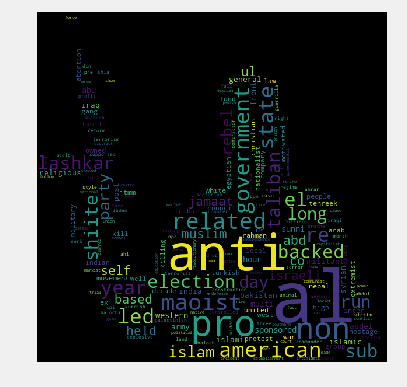

In [44]:
import nltk
from wordcloud import WordCloud, STOPWORDS
motive=terror['Motive'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words=nltk.tokenize.word_tokenize(motive)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
f1=open("kaggle.png", "wb")
f1.write(codecs.decode(kaggle,'base64'))
f1.close()
img1 = imread("kaggle.png")
hcmask1 = img1
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black',mask=hcmask1).generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.axis('off')
plt.show()


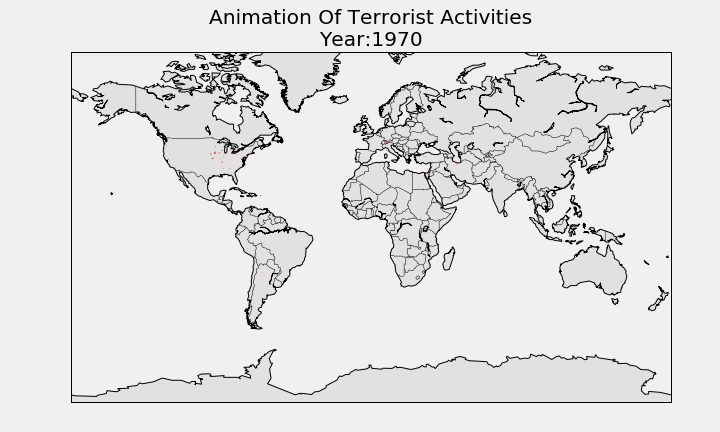

In [46]:
fig = plt.figure(figsize = (10,6))
def animate(Year):
    ax = plt.axes()
    ax.clear()
    ax.set_title('Animation Of Terrorist Activities'+'\n'+'Year:' +str(Year))
    m6 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
    lat6=list(terror[terror['Year']==Year].latitude)
    long6=list(terror[terror['Year']==Year].longitude)
    x6,y6=m6(long6,lat6)
    m6.scatter(x6, y6,s=[(kill+wound)*0.1 for kill,wound in zip(terror[terror['Year']==Year].Killed,terror[terror['Year']==Year].Wounded)],color = 'r')
    m6.drawcoastlines()
    m6.drawcountries()
    m6.fillcontinents(zorder = 1,alpha=0.4)
    m6.drawmapboundary()
ani = animation.FuncAnimation(fig,animate,list(terror.Year.unique()), interval = 1500)    
ani.save('animation.gif', writer='imagemagick', fps=1)
plt.close(1)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))